In [1]:
#USE_MP=False
import silq

silq.initialize("EWJN")

qc.show_subprocess_widget()
%matplotlib nbagg

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initializing instruments
Initializing layout
Initializing data
Initializing analysis
Initializing parameters
Initializing plotting
Initialization complete


# DC sweep

### Turnon

In [403]:
for k in np.linspace(1.5,0,6):
    turnon_param(k)

In [4]:
turnon_vals = list(np.linspace(0, 1.6, 200))

In [ ]:
DC_parameter.setup()
# data = qc.Loop(turnon_param[turnon_vals]
data = qc.Loop(dummy_param[0:1000:1], delay=1
               ).each(DC_parameter
                      ).then(qc.Task(layout.stop)
                             ).run(name='turnon',
                                   progress_interval=True)
plot = qc.MatPlot(data.DC_voltage)

### Pinchoff

In [6]:
turnon_voltage = 1.9
pinchoff_vals = list(np.linspace(turnon_voltage, 0, 200))
gate = RB

turnon_param(turnon_voltage)
DC_parameter.setup()
data = qc.Loop(gate[pinchoff_vals]
               ).each(DC_parameter
                      ).then(qc.Task(layout.stop)
                             ).run(name='Pinchoff_{}'.format(gate.name),
                                   progress_interval=True)
plot = qc.MatPlot(data.DC_voltage)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-10-12/#013_Pinchoff_RB_15-51-46'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | RB_set     | RB           | (200,)
   Measured | DC_voltage | DC_voltage   | (200,)
started at 2016-10-12 15:51:47


### 1D DC scan

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-11-03/#003_DC_TGAC_scan_11-50-05'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | TGAC_set   | TGAC         | (50,)
   Measured | DC_voltage | DC_voltage   | (50,)
started at 2016-11-03 11:50:08


<IPython.core.display.Javascript object>


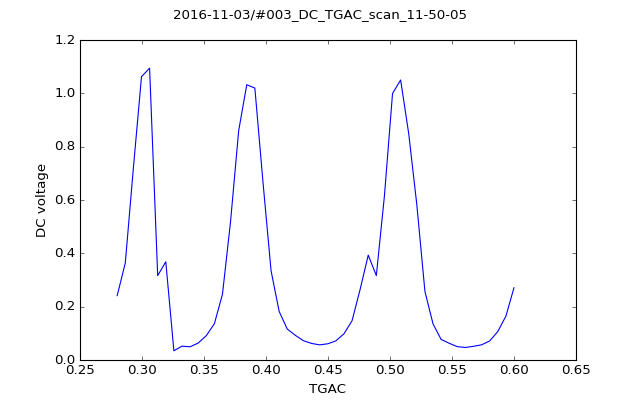

In [2]:
gate1 = TGAC

gate1_vals = list(np.linspace(0.28,0.6, 50))

DC_parameter.setup()
data = qc.Loop(gate1[gate1_vals]
              ).each(DC_parameter
                    ).then(qc.Task(layout.stop)
                          ).run(name='DC_{}_scan'.format(gate1.name),
                                progress_interval=True)

plot = qc.MatPlot(data.DC_voltage)

### 2D DC scans

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-11-21/#001_DC_TGAC_vs_DF_DS_scan_10-28-18'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | TGAC_set   | TGAC         | (20,)
   Setpoint | DF_DS_set  | DF_DS        | (20, 40)
   Measured | DC_voltage | DC_voltage   | (20, 40)
started at 2016-11-21 10:28:30


<IPython.core.display.Javascript object>


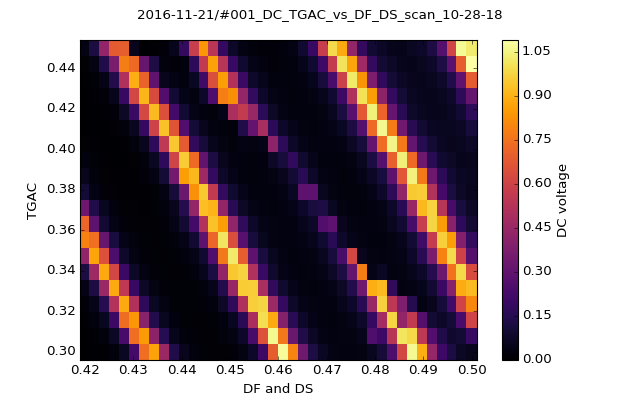

In [25]:
gate1 = TGAC
gate2 = DF_DS

gate1_vals = list(np.linspace(0.3,0.45, 20))
gate2_vals = list(np.linspace(0.42, 0.5, 40))

DC_parameter.setup()
data = qc.Loop(gate1[gate1_vals]
              ).loop(gate2[gate2_vals]
                    ).each(DC_parameter
                          ).then(qc.Task(layout.stop)
                                ).run(name='DC_{}_vs_{}_scan'.format(gate1.name, gate2.name),
                                      progress_interval=True)

plot = qc.MatPlot(data.DC_voltage)

# ELR sequence - no steering/ESR

In [27]:
ELR_parameter.pulse_sequence['read'].duration = 80
ELR_parameter.setup(samples=100, t_read=20)
#result = ELR_parameter()

In [84]:
ELR_parameter.pulse_sequence

PulseSequence with 4 pulses, duration: 62
	DCPulse(empty, A=-1.5, t_start=0, t_stop=5)
	DCPulse(load, A=1.5, t_start=5, t_stop=10)
	DCPulse(read, A=0, t_start=10, t_stop=60)
	DCPulse(final, A=0, t_start=60, t_stop=62)

In [29]:
TGAC_vals = list(np.linspace(0.32,0.36,8))
DF_DS_vals = list(np.linspace(0.47, 0.485,8))

In [30]:
ELR_parameter.pulse_sequence['read'].duration = 100
ELR_parameter.setup(samples=80, t_read=20)
data = qc.Loop(TGAC[TGAC_vals]
              ).loop(DF_DS[DF_DS_vals]
                    ).each(ELR_parameter
                          ).run(name='ELR_calibration',
                                progress_interval=True)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-11-21/#002_ELR_calibration_10-35-53'
   <Type>   | <array_id>     | <array.name>   | <array.shape>
   Setpoint | TGAC_set       | TGAC           | (8,)
   Setpoint | DF_DS_set      | DF_DS          | (8, 8)
   Measured | fidelity_empty | fidelity_empty | (8, 8)
   Measured | fidelity_load  | fidelity_load  | (8, 8)
   Measured | fidelity_read  | fidelity_read  | (8, 8)
   Measured | up_proportion  | up_proportion  | (8, 8)
   Measured | dark_counts    | dark_counts    | (8, 8)
   Measured | contrast       | contrast       | (8, 8)
started at 2016-11-21 10:35:55


<IPython.core.display.Javascript object>


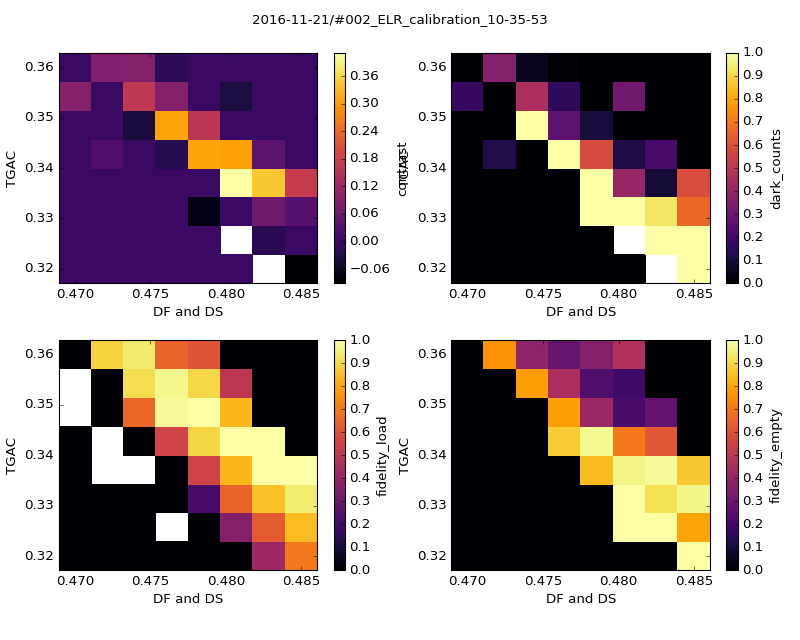

In [31]:
plot = qc.MatPlot(subplots=(2,2), figsize=(10,8), interval=10)
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [2]:
SIM900.reset_slot(6)

In [32]:
TGAC(0.337)
DF_DS(0.4828)

In [80]:
ELR_parameter.setup(samples=150, print_flag=True)
ELR_parameter();

fidelity_empty: 0.841
fidelity_load: 1.000
fidelity_read: 0.757
up_proportion: 0.544
dark_counts: 0.130
contrast: 0.413


## Threshold voltage

In [3]:
ELR_parameter.setup(samples=50)
ELR_parameter()
traces_read = ELR_parameter.trace_segments['output']['read']
_, _, threshold_voltage = analysis.find_high_low(traces_read)
assert threshold_voltage is not None, "Couldn't find accurate threshold"
print('Threshold voltage found at {:.2f} V'.format(threshold_voltage))

Threshold voltage found at 0.54 V


# Adiabatic sweep scan - ESR, no steering

### center frequency scan

This code sweeps over the adiabatic sweep center frequency to find the ESR frequency.

To find the ESR frequency, use 28GHz * B0 as starting point, and search around that frequency.
Use a big initial frequency_deviation (around 60 MHz) and long duration (0.5 ms)
Once you see a spike in contrast, center around there and decrease both deviation and duration.

In [37]:
adiabatic_sweep_parameter(33e9)
keysight.power()

In [36]:
adiabatic_sweep_parameter.steered_initialization=False

In [37]:
adiabatic_sweep_parameter.pulse_sequence

PulseSequence with 4 pulses, duration: 62
	DCPulse(load, A=1.5, t_start=0, t_stop=10)
	FrequencyRampPulse(adiabatic_sweep, f_start=19995.00 MHz, f_stop=20005.00, A=None, t_start=9, t_stop=9.2)
	DCPulse(read, A=0, t_start=10, t_stop=60)
	DCPulse(final, A=0, t_start=60, t_stop=62)

In [22]:
interfaces['arbstudio'].final_delay(10)

adiabatic_sweep_parameter.pulse_sequence['adiabatic_sweep'].frequency_deviation=10e6
adiabatic_sweep_parameter.pulse_sequence['adiabatic_sweep'].duration = 0.2

In [23]:
f_center = 33.57e9
f_span = 60e6
f_step = 3e6
adiabatic_sweep_vals = list(np.arange(f_center-f_span/2, f_center+f_span/2, f_step))

adiabatic_sweep_parameter.setup(samples=100, readout_threshold_voltage=threshold_voltage)


In [10]:
adiabatic_sweep_parameter.pulse_sequence['adiabatic_sweep'].duration

0.5

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-11-21/#012_adiabatic_sweep_16-29-48'
   <Type>   | <array_id>          | <array.name>    | <array.shape>
   Setpoint | adiabatic_sweep_set | adiabatic_sweep | (20,)
   Measured | fidelity_load       | fidelity_load   | (20,)
   Measured | fidelity_read       | fidelity_read   | (20,)
   Measured | up_proportion       | up_proportion   | (20,)
   Measured | dark_counts         | dark_counts     | (20,)
   Measured | contrast            | contrast        | (20,)
started at 2016-11-21 16:29:51


<IPython.core.display.Javascript object>


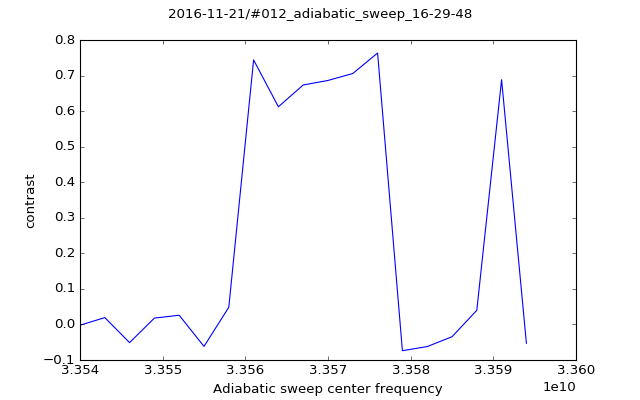

In [24]:
data = qc.Loop(adiabatic_sweep_parameter[adiabatic_sweep_vals]
                     ).each(adiabatic_sweep_parameter
                           ).run(name='adiabatic_sweep',
                                progress_interval=True)
plot = qc.MatPlot(data.contrast, use_offset=False)

## LR calibration scan - ESR and steering

In [6]:
TGAC_vals = list(np.linspace(0.33,0.35,8))
DF_DS_vals = list(np.linspace(0.474, 0.485,8))

In [29]:
#steered_controller.setup(readout_threshold_voltage=threshold_voltage)
#layout.setup(samples=10, readout_threshold_voltage=threshold_voltage)
adiabatic_sweep_parameter = measurement_parameters.AdiabaticSweep_Parameter(layout=layout)
adiabatic_sweep_parameter.setup(threshold_voltage,samples=80)
adiabatic_sweep_parameter.pulse_sequence['read'].duration = 80

frequency_center = 33.568e9
adiabatic_sweep_parameter(frequency_center)
adiabatic_sweep_parameter.pulse_sequence['adiabatic_sweep'].frequency_deviation=10e6
adiabatic_sweep_parameter.pulse_sequence['adiabatic_sweep'].duration = 0.2

In [43]:
T1_parameter.pulse_sequence['adiabatic_sweep'].frequency_center

33570000000.0

In [27]:
adiabatic_sweep_parameter.pulse_sequence

PulseSequence with 5 pulses, duration: 92
	DCPulse(load, A=1.5, t_start=0, t_stop=10)
	SteeredInitialization(steered_initialization, t_no_blip=30 ms, t_max_wait=200, t_buffer=20)
	FrequencyRampPulse(adiabatic_sweep, f_start=33563.00 MHz, f_stop=33573.00, A=None, t_start=9, t_stop=9.5)
	DCPulse(read, A=0, t_start=10, t_stop=90)
	DCPulse(final, A=0, t_start=90, t_stop=92)

In [10]:
data = qc.Loop(TGAC[TGAC_vals]
              ).loop(DF_DS[DF_DS_vals]
                    ).each(adiabatic_sweep_parameter
                          ).run(name='adiabatic_calibration',
                                progress_interval=True)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-11-21/#011_adiabatic_calibration_15-44-10'
   <Type>   | <array_id>    | <array.name>  | <array.shape>
   Setpoint | TGAC_set      | TGAC          | (8,)
   Setpoint | DF_DS_set     | DF_DS         | (8, 8)
   Measured | fidelity_load | fidelity_load | (8, 8)
   Measured | fidelity_read | fidelity_read | (8, 8)
   Measured | up_proportion | up_proportion | (8, 8)
   Measured | dark_counts   | dark_counts   | (8, 8)
   Measured | contrast      | contrast      | (8, 8)
started at 2016-11-21 15:44:15


<IPython.core.display.Javascript object>


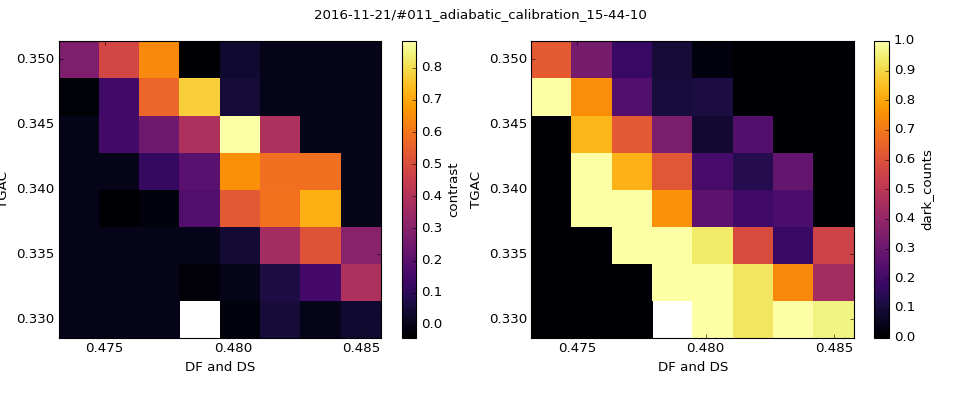

In [11]:
plot = qc.MatPlot(subplots=(1,2), figsize=(12,5), interval=10)
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [16]:
TGAC(0.340)
DF_DS(0.482)

In [46]:
adiabatic_sweep_parameter.setup(samples=150, readout_threshold_voltage=threshold_voltage, print_flag=True)
adiabatic_sweep_parameter();

fidelity_load: 0.000
fidelity_read: 0.664
up_proportion: 0.898
dark_counts: 0.092
contrast: 0.806


### calibration of adiabatic sweep: frequency span versus time scan

In [5]:
pulse = adiabatic_sweep_parameter.pulse_sequence['adiabatic_sweep']
adiabatic_deviation_parameter = general_parameters.AttributeParameter(object=pulse, attribute='frequency_deviation')
adiabatic_duration_parameter = general_parameters.AttributeParameter(object=pulse, attribute='duration')

adiabatic_deviation_vals = list(np.logspace(5.5, 7.8, 8))
adiabatic_duration_vals = list(np.logspace(-2.7, -0.3, 8))

In [18]:
adiabatic_sweep_parameter.pulse_sequence['read'].duration = 100
adiabatic_sweep_parameter.setup(samples=400)
adiabatic_sweep_parameter(frequency_center)
data = qc.Loop(adiabatic_deviation_parameter[adiabatic_deviation_vals]
              ).loop(adiabatic_duration_parameter[adiabatic_duration_vals]
                    ).each(adiabatic_sweep_parameter
                          ).run(name='adiabatic_deviation_vs_duration',
                                progress_interval=True)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-11-11/#004_adiabatic_deviation_vs_duration_09-57-31'
   <Type>   | <array_id>              | <array.name>        | <array.shape>
   Setpoint | frequency_deviation_set | frequency_deviation | (10,)
   Setpoint | duration_set            | duration            | (10, 8)
   Measured | fidelity_load           | fidelity_load       | (10, 8)
   Measured | fidelity_read           | fidelity_read       | (10, 8)
   Measured | up_proportion           | up_proportion       | (10, 8)
   Measured | dark_counts             | dark_counts         | (10, 8)
   Measured | contrast                | contrast            | (10, 8)
started at 2016-11-11 09:57:34


<IPython.core.display.Javascript object>


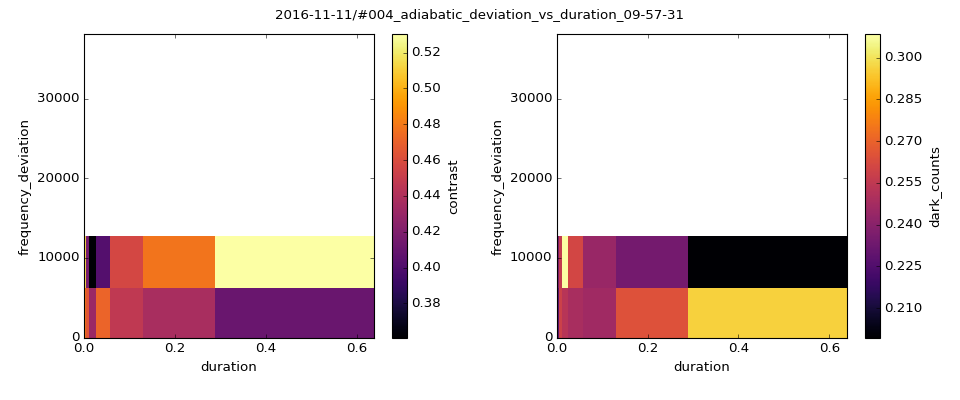

In [21]:
plot = qc.MatPlot(subplots=(1,2), figsize=(12,5), interval=10)
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
# for ax in plot.subplots:
#     ax.set_xscale('log')
#     ax.set_yscale('log')
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Read level sweep - to be fixed

In [28]:
variable_read_parameter.setup(samples=100)
data = qc.Loop(variable_read_parameter[-1.5:2.5:0.04]
                     ).each(variable_read_parameter
                           ).run(name='variable_read',
                                progress_interval=True)

NameError: name 'variable_read_parameter' is not defined

In [42]:
plotQ = qc.QtPlot()
plotQ.add(data.Channel_A_signal)

plotQ = qc.QtPlot()
plotQ.add(data.Channel_C_signal)

# T1 measurement

In [62]:
T1_parameter = measurement_parameters.T1_Parameter(layout=layout)
T1_parameter.pulse_sequence['read'].duration = 40
frequency_center = 33.568e9
T1_parameter.pulse_sequence['adiabatic_sweep'].frequency_deviation=10e6
T1_parameter.pulse_sequence['adiabatic_sweep'].duration = 0.2
T1_parameter.setup(threshold_voltage, samples=100, print_flag=True)
T1_parameter.pulse_sequence['adiabatic_sweep'].frequency_center=frequency_center
T1_parameter.pulse_sequence['adiabatic_sweep'].t_start=1.8
T1_parameter.pulse_sequence['adiabatic_sweep'].t_stop=2



In [4]:
T1_parameter.pulse_sequence['read'].duration = 20
T1_parameter(10)
T1_parameter.pulse_sequence

PulseSequence with 4 pulses, duration: 37
	DCPulse(empty, A=-1.5, t_start=0, t_stop=5)
	DCPulse(plunge, A=1.5, t_start=5, t_stop=15)
	DCPulse(read, A=0, t_start=15, t_stop=35)
	DCPulse(final, A=0, t_start=35, t_stop=37)

In [69]:
T1_parameter.steered_initialization=False
T1_parameter.pulse_sequence.remove('adiabatic_sweep')
T1_parameter.pulse_sequence.remove('adiabatic_plunge')


AssertionError: No unique pulse named adiabatic_sweep, found 0 pulses

In [81]:
T1_parameter.pulse_sequence['plunge'].t_start=0
T1_parameter(5)

In [82]:
T1_parameter.pulse_sequence

PulseSequence with 3 pulses, duration: 47
	DCPulse(plunge, A=1.5, t_start=0, t_stop=5)
	DCPulse(read, A=0, t_start=5, t_stop=45)
	DCPulse(final, A=0, t_start=45, t_stop=47)

In [5]:
%time up_proportion,number_traces_loaded = T1_parameter()

Wall time: 5.22 s


In [6]:
up_proportion

0.55670103092783507

In [7]:
# Calculate T1 durations (shuffled)
T1_wait_times = list(np.logspace(0.5,3.75,num=20,base=10))
#np.random.shuffle(T1_wait_times)
print('Shuffled T1 wait times: {}'.format(T1_wait_times))

Shuffled T1 wait times: [3.1622776601683795, 4.6887020046728169, 6.9519279617756053, 10.307608019778598, 15.283067326587688, 22.660169698035251, 33.598182862837831, 49.815950486132714, 73.861998220793623, 109.515019344802, 162.37767391887209, 240.75701346762409, 356.96988468260662, 529.27844856926401, 784.75997035146145, 1163.5618505359071, 1725.2105499420409, 2557.9658187147397, 3792.6901907322499, 5623.4132519034911]


DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-11-22/#002_T1_single_sweep_11-43-13'
   <Type>   | <array_id>        | <array.name>      | <array.shape>
   Setpoint | T1_wait_time_set  | T1_wait_time      | (20,)
   Measured | up_proportion     | up_proportion     | (20,)
   Measured | num_traces_loaded | num_traces_loaded | (20,)
started at 2016-11-22 11:43:24


<IPython.core.display.Javascript object>


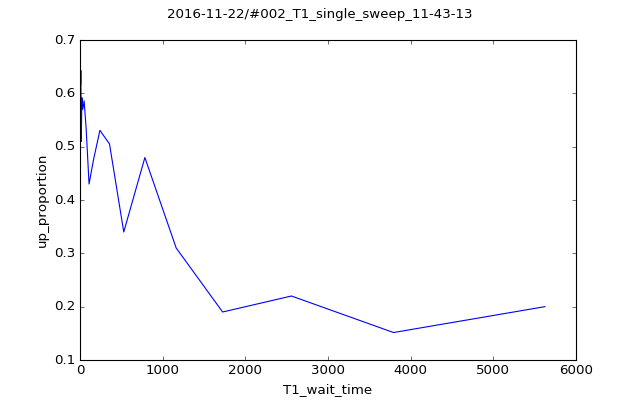

In [8]:
# Single T1 sweep

data = qc.Loop(T1_parameter[T1_wait_times]
                     ).each(T1_parameter
                           ).run(name='T1_single_sweep')

plotQ = qc.MatPlot()
plotQ.add(data.up_proportion)

In [9]:
data = qc.Loop(dummy_parameter[0:30:1]
              ).each(qc.Loop(T1_parameter[T1_wait_times]).each(T1_parameter)
                    ).run(name='T1_data', progress_interval=True)


DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-11-22/#003_T1_data_12-20-17'
   <Type>   | <array_id>        | <array.name>      | <array.shape>
   Setpoint | dummy_set         | dummy             | (30,)
   Setpoint | T1_wait_time_set  | T1_wait_time      | (30, 20)
   Measured | up_proportion     | up_proportion     | (30, 20)
   Measured | num_traces_loaded | num_traces_loaded | (30, 20)
started at 2016-11-22 12:20:20


<IPython.core.display.Javascript object>


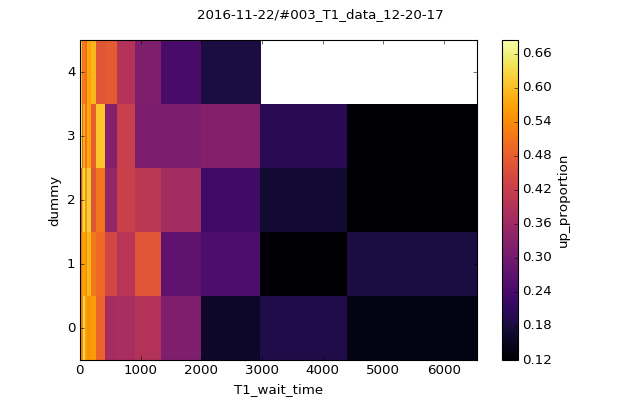

In [10]:
plotQ = qc.MatPlot()
plotQ.add(data.up_proportion)

Number of successful sweeps: 4


<IPython.core.display.Javascript object>


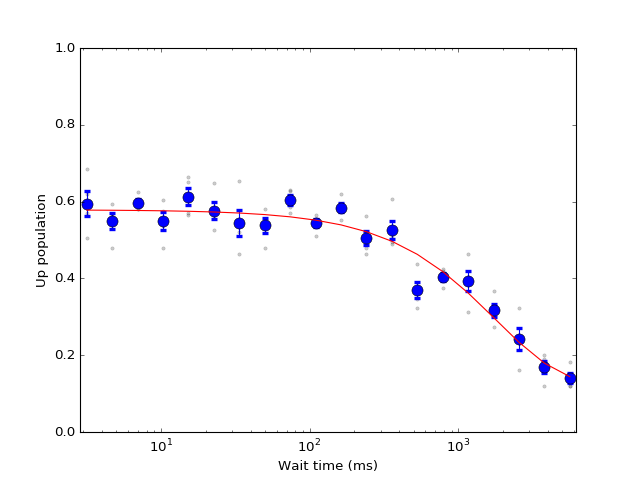

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 20
    # variables        = 3
    chi-square         = 1221431630868.348
    reduced chi-square = 71848919462.844
    Akaike info crit   = 502.706
    Bayesian info crit = 505.693
[[Variables]]
    amplitude:   0.45441885 +/- 0.039307 (8.65%) (init= 0.5492666)
    offset:      0.12421668 +/- 0.040439 (32.56%) (init= 0.1404545)
    tau:         1796.24706 +/- 379.8374 (21.15%) (init= 2553.277)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, offset)         = -0.963 
    C(offset, tau)               = -0.863 
    C(amplitude, tau)            =  0.773 



In [13]:

T1_msmt = T1_Measurement(B0=1.2, location='2016-11-22/#003_T1_data_12-20-17')
T1_msmt.plot_T1()
print(T1_msmt.fit_result.fit_report())

In [40]:
#data.arrays['up_proportion']
data.T1_wait_time_set[0]

array([  3.16227766e+00,   4.68870200e+00,   6.95192796e+00,
         1.03076080e+01,   1.52830673e+01,   2.26601697e+01,
         3.35981829e+01,   4.98159505e+01,   7.38619982e+01,
         1.09515019e+02,   1.62377674e+02,   2.40757013e+02,
         3.56969885e+02,   5.29278449e+02,   7.84759970e+02,
         1.16356185e+03,   1.72521055e+03,   2.55796582e+03,
         3.79269019e+03,   5.62341325e+03])

In [15]:
# Continuous T1 sweep
setup_ELRLR = partial(ELRLR_parameter.setup, samples=400, data_manager=data_manager_raw)
setup_T1 = partial(T1_parameter.setup, threshold_voltage=threshold_voltage, samples=150, data_manager=data_manager_raw)
setup_ELRLR()
setup_T1()
data = qc.Loop(dummy_param[0:30:1]
              ).each(qc.Task(setup_ELRLR),
                     ELRLR_parameter,
                     qc.Task(setup_T1),
                     qc.Loop(T1_parameter[T1_wait_times]).each(T1_parameter)
                    ).run(name='T1_data', progress_interval=True)

# plotQ = qc.QtPlot()
# plotQ.add(data.up_proportion)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-10-21/#009_T1_data_17-09-21'
   <Type>   | <array_id>          | <array.name>      | <array.shape>
   Setpoint | dummy_set           | dummy             | (30,)
   Measured | fidelity_empty      | fidelity_empty    | (30,)
   Measured | fidelity_load       | fidelity_load     | (30,)
   Measured | fidelity_read       | fidelity_read     | (30,)
   Measured | up_proportion_1_3   | up_proportion     | (30,)
   Measured | dark_counts         | dark_counts       | (30,)
   Measured | contrast            | contrast          | (30,)
   Setpoint | T1_wait_time_set    | T1_wait_time      | (30, 20)
   Measured | up_proportion_3_0_0 | up_proportion     | (30, 20)
   Measured | num_traces_loaded   | num_traces_loaded | (30, 20)
started at 2016-10-21 17:09:23


In [19]:
data.sync()
print(data.T1_wait_time_set[0])
data.up_proportion_3_0_0[29]

[  1.58489000e+04   2.22520000e+02   1.07542000e+04   3.20083000e+01
   1.02453000e+02   3.27936000e+02   7.12249000e+02   1.04967000e+03
   4.95150000e+03   7.29723000e+03   1.54694000e+03   1.50990000e+02
   4.71720000e+01   2.17191000e+01   2.27979000e+03   3.35982000e+03
   4.83293000e+02   1.47374000e+01   1.00000000e+01   6.95193000e+01]


array([ 0.14094 ,  0.42    ,  0.193333,  0.510067,  0.463087,  0.436242,
        0.422819,  0.42953 ,  0.194631,  0.213333,  0.342282,  0.433333,
        0.44    ,  0.418919,  0.328859,  0.263514,  0.456376,  0.483221,
        0.436242,  0.44898 ])

# Notes

To save individual traces when performing a measurement, set:
    
ELR_parameter.setup(samples=100, data_manager=data_manager_raw)

In [6]:
steered_initialization = adiabatic_sweep_parameter.pulse_sequence['steered_initialization']

AssertionError: Found more than one pulse with name steered_initialization

In [10]:
adiabatic_sweep_parameter.pulse_sequence['load'].t_stop=15

In [63]:
adiabatic_sweep_parameter.steered_initialization

False

In [65]:
steered_controller.record_initialization_traces

<qcodes.instrument.remote.RemoteParameter: record_initialization_traces at 203922680>

To enable/disable steered initialization, use:

adiabatic_sweep_parameter.steered_intialization = True/False

This adds/removes the steered initialization "pulse" from the ELR_parameter.pulse_sequence
If steered_initialization is enabled, you can access and modify its properties via

steered_initialization = adiabatic_sweep_parameter.pulse_sequence['steered_initialization']

Note that steered initialization is currently only implemented for the adiabatic sweep, but is easy to add for other parameters, such as T1_parameter (just add the pulse)

steered_controller is the acquisition controller specifically for steered initialization
You can look at the initialization traces when using steered initialization.

First set the flag 
steered_controller.record_initialization_traces(True)

The initialization traces can then be accessed
steered_controller.initialization_traces()

You can also look at the first buffer after the pulseblaster.start() command has been set via
steered_controller.post_initialization_traces()
This can be useful for checking the delay between sending the command and plunging

To setup a parameter where steered initialization is enabled, you must pass it a readout threshold voltage every time.

adiabatic_sweep_parameter.setup(readout_threshold_voltage=threshold_voltage)

This threshold voltage can be obtained from an ELR scan (see T1_measurement):

ELR_parameter.setup(samples=30)
ELR_parameter()
traces_read = ELR_parameter.trace_segments['output']['read']
_, _, readout_threshold_voltage = analysis.find_high_low(traces_read)

In [ ]:
adiabatic_sweep_parameter.pulse_sequence.add(adiabatic_sweep_parameter._steered_initialization)
adiabatic_sweep_parameter.pulse_sequence.remove(adiabatic_sweep_parameter._steered_initialization)